## Data Pre Processing

In [9]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt

dataset_path = os.listdir('dataset')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['Holy basil', 'Mint', 'Sweet basil']
Types of classes labels found:  3


In [10]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('dataset' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [11]:
# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

       Labels                                              image
0  Holy basil  dataset_path/Holy basil/00b69b4f9c30558c46dd28...
1  Holy basil  dataset_path/Holy basil/0fc08a283c1c69c2e4f0da...
2  Holy basil  dataset_path/Holy basil/1038c1c87f7b6d1088cd31...
3  Holy basil  dataset_path/Holy basil/1296x728_Holy_Basil_11...
4  Holy basil  dataset_path/Holy basil/13ecc69c669e9b6ae12d73...
          Labels                                              image
148  Sweet basil  dataset_path/Sweet basil/sweet-thai-basil-5c0b...
149  Sweet basil  dataset_path/Sweet basil/sweet-thai-basil-herb...
150  Sweet basil          dataset_path/Sweet basil/thai-basil-2.jpg
151  Sweet basil    dataset_path/Sweet basil/thai-sweet-basil_1.jpg
152  Sweet basil  dataset_path/Sweet basil/Thaisweetbasil_1024x1...


In [12]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  153
Labels
Mint           72
Holy basil     41
Sweet basil    40
Name: count, dtype: int64


In [13]:
import cv2
path = 'dataset/'
dataset_path = os.listdir('dataset')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [14]:
#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(153, 224, 224, 3)

In [16]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['Holy basil' 'Holy basil' 'Holy basil' 'Holy basil' 'Holy basil'
 'Holy basil' 'Holy basil' 'Holy basil' 'Holy basil' 'Holy basil'
 'Holy basil' 'Holy basil' 'Holy basil' 'Holy basil' 'Holy basil'
 'Holy basil' 'Holy basil' 'Holy basil' 'Holy basil' 'Holy basil'
 'Holy basil' 'Holy basil' 'Holy basil' 'Holy basil' 'Holy basil'
 'Holy basil' 'Holy basil' 'Holy basil' 'Holy basil' 'Holy basil'
 'Holy basil' 'Holy basil' 'Holy basil' 'Holy basil' 'Holy basil'
 'Holy basil' 'Holy basil' 'Holy basil' 'Holy basil' 'Holy basil'
 'Holy basil' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint'
 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint'
 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint'
 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint'
 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint'
 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint'
 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Mint' 'Min

In [17]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0

In [18]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(145, 224, 224, 3)
(145, 3)
(8, 224, 224, 3)
(8, 3)


## EfficientNet Implementation

In [23]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

# from tensorflow.python.keras import layers
# from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 3
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# Using model without transfer learning
outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)
print(outputs)

<KerasTensor shape=(None, 3), dtype=float32, sparse=False, name=keras_tensor_965>


In [24]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=30, verbose=2)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 3)              │     4,053,414 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,053,414 (15.46 MB)

 Trainable params: 4,011,391 (15.30 MB)

 Non-trainable params: 42,023 (164.16 KB)

Epoch 1/30
5/5 - 54s - 11s/step - accuracy: 0.3448 - loss: 7.8067
Epoch 2/30
5/5 - 20s - 4s/step - accuracy: 0.3862 - loss: 3.0154
Epoch 3/30
5/5 - 15s - 3s/step - accuracy: 0.3517 - loss: 2.5951
Epoch 4/30
5/5 - 20s - 4s/step - accuracy: 0.4000 - loss: 4.0092
Epoch 5/30
5/5 - 14s - 3s/step - accuracy: 0.4000 - loss: 2.4412
Epoch 6/30
5/5 - 13s - 3s/step - accuracy: 0.5310 - loss: 2.0100
Epoch 7/30
5/5 - 13s - 3s/step - accuracy: 0.5103 - loss: 2.0215
Epoch 8/30
5/5 - 14s - 3s/step - accuracy: 0.5724 - loss: 1.2016
Epoch 9/30
5/5 - 13s - 3s/step - accuracy: 0.6138 - loss: 1.7242
Epoch 10/30
5/5 - 13s - 3s/step - accuracy: 0.6966 - loss: 1.9475
Epoch 11/30
5/5 - 13s - 3s/step - accuracy: 0.6690 - loss: 1.7145
Epoch 12/30
5/5 - 13s - 3s/step - accuracy: 0.7310 - loss: 1.2876
Epoch 13/30
5/5 - 13s - 3s/step - accuracy: 0.6897 - loss: 1.5945
Epoch 14/30
5/5 - 13s - 3s/step - accuracy: 0.7310 - loss: 1.5097
Epoch 15/30
5/5 - 13s - 3s/step - accuracy: 0.7655 - loss: 1.2791
Epoch 16/30
5/5 - 

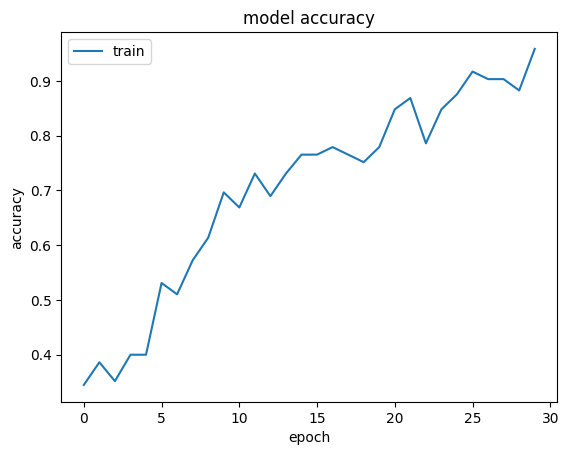

In [25]:
# import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [26]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2500 - loss: 4.3475
Loss = 4.347474575042725
Test Accuracy = 0.25


## Testing Efficient Model On Unseen data

In [ ]:
## WIP